In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Reward distributions
mu_1, sigma_1 = 6, np.sqrt(15)  # Lever 1: Gaussian
mu_21, sigma_21 = 11, np.sqrt(16)  # Lever 2: Gaussian 1
mu_22, sigma_22 = 3, np.sqrt(8)  # Lever 2: Gaussian 2

# Epsilon values for epsilon-greedy policy
epsilon_values = [0, 0.1, 0.2, 0.5]

# Learning rate functions
def alpha_1(k): return 1
def alpha_2(k): return 0.9 ** k
def alpha_3(k): return 1 / (1 + np.log(1 + k))
def alpha_4(k): return 1 / k if k > 0 else 1

learning_rates = {
    "alpha_1": alpha_1,
    "alpha_2": alpha_2,
    "alpha_3": alpha_3,
    "alpha_4": alpha_4
}

In [5]:
# Epsilon-greedy policy
def epsilon_greedy(Q, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice([0, 1])  # Random action
    return np.argmax(Q)  # Greedy action

In [7]:
def simulate_bandit(epsilon, alpha_func, steps=1000, runs=100):
    accumulated_rewards = np.zeros((runs, steps))  # To store rewards for each run
    final_Q_values = np.zeros((runs, 2))  # Store Q-values at the end of 1000 steps

    for run in range(runs):
        Q = np.array([0.0, 0.0])  # Initial Q-values for both levers
        rewards = []

        for k in range(1, steps + 1):
            # Select an action using epsilon-greedy
            action = epsilon_greedy(Q, epsilon)

            # Get reward based on the action
            if action == 0:
                reward = np.random.normal(mu_1, sigma_1)
            else:
                reward = np.random.choice([np.random.normal(mu_21, sigma_21), 
                                           np.random.normal(mu_22, sigma_22)])

            # Update Q-value using learning rate
            alpha = alpha_func(k)
            Q[action] += alpha * (reward - Q[action])

            # Track accumulated reward
            if k == 1:
                rewards.append(reward)
            else:
                rewards.append((rewards[-1] * (k - 1) + reward) / k)

        accumulated_rewards[run] = rewards
        final_Q_values[run] = Q

    # Compute averages over all runs
    avg_accumulated_rewards = np.mean(accumulated_rewards, axis=0)
    avg_Q_values = np.mean(final_Q_values, axis=0)

    return avg_accumulated_rewards, avg_Q_values

Learning Rate: alpha_1, ε = 0
Average Q(a1): -1.89, True Q*(a1): 6
Average Q(a2): 2.61, True Q*(a2): 7

Learning Rate: alpha_1, ε = 0.1
Average Q(a1): 2.92, True Q*(a1): 6
Average Q(a2): 2.82, True Q*(a2): 7

Learning Rate: alpha_1, ε = 0.2
Average Q(a1): 3.66, True Q*(a1): 6
Average Q(a2): 3.81, True Q*(a2): 7

Learning Rate: alpha_1, ε = 0.5
Average Q(a1): 5.06, True Q*(a1): 6
Average Q(a2): 5.31, True Q*(a2): 7



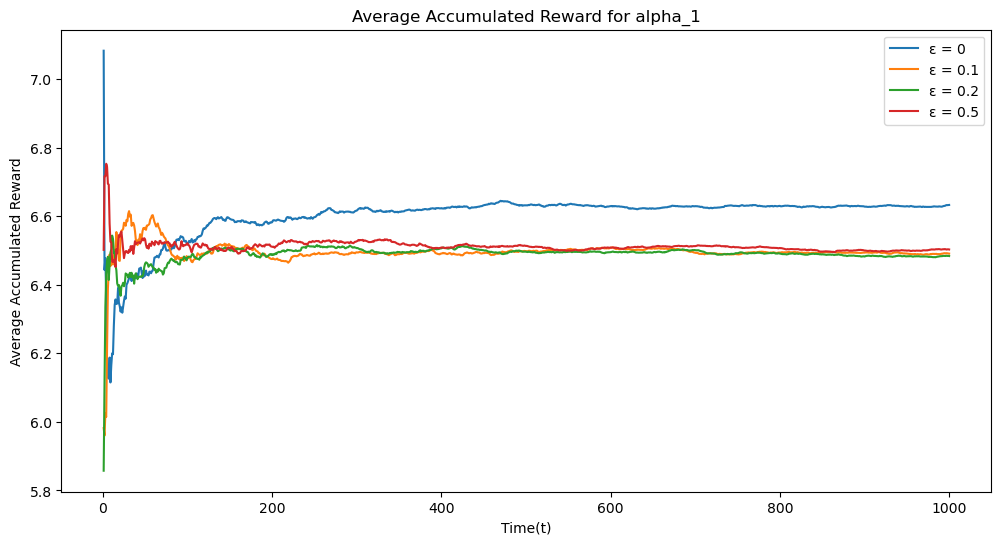

Learning Rate: alpha_2, ε = 0
Average Q(a1): 5.28, True Q*(a1): 6
Average Q(a2): 0.74, True Q*(a2): 7

Learning Rate: alpha_2, ε = 0.1
Average Q(a1): 5.10, True Q*(a1): 6
Average Q(a2): 2.44, True Q*(a2): 7

Learning Rate: alpha_2, ε = 0.2
Average Q(a1): 4.92, True Q*(a1): 6
Average Q(a2): 4.28, True Q*(a2): 7

Learning Rate: alpha_2, ε = 0.5
Average Q(a1): 5.37, True Q*(a1): 6
Average Q(a2): 6.17, True Q*(a2): 7



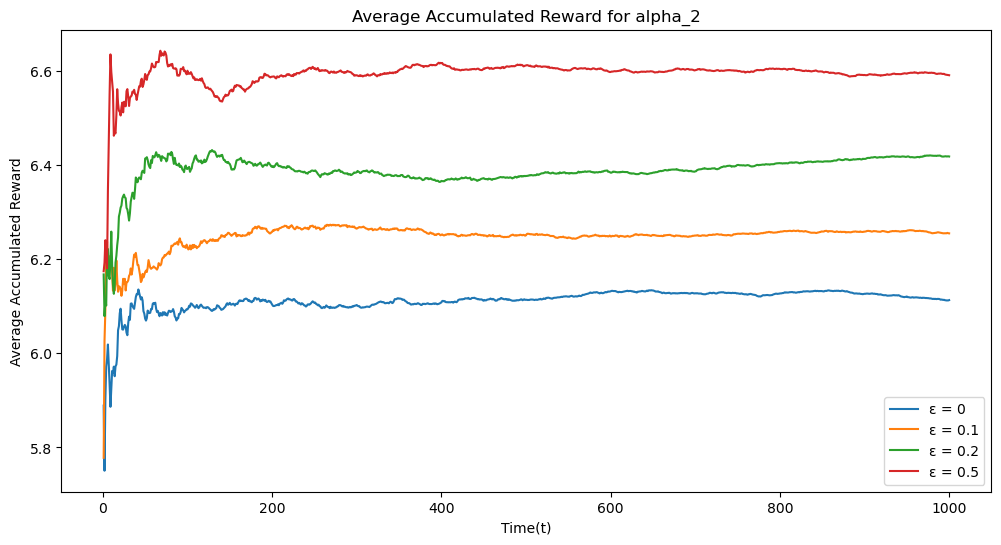

Learning Rate: alpha_3, ε = 0
Average Q(a1): 5.59, True Q*(a1): 6
Average Q(a2): 0.48, True Q*(a2): 7

Learning Rate: alpha_3, ε = 0.1
Average Q(a1): 5.21, True Q*(a1): 6
Average Q(a2): 5.87, True Q*(a2): 7

Learning Rate: alpha_3, ε = 0.2
Average Q(a1): 5.34, True Q*(a1): 6
Average Q(a2): 6.48, True Q*(a2): 7

Learning Rate: alpha_3, ε = 0.5
Average Q(a1): 5.83, True Q*(a1): 6
Average Q(a2): 6.74, True Q*(a2): 7



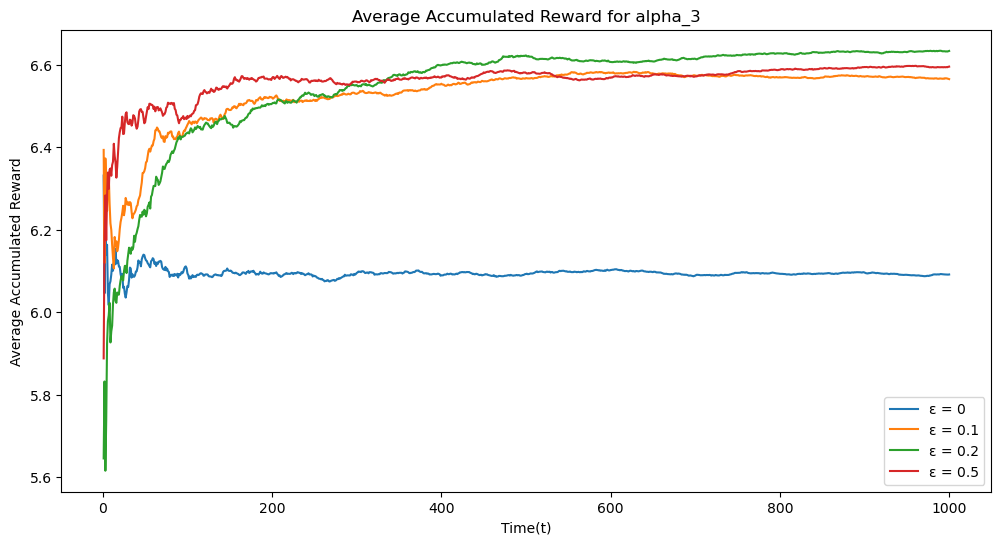

Learning Rate: alpha_4, ε = 0
Average Q(a1): 5.18, True Q*(a1): 6
Average Q(a2): 0.84, True Q*(a2): 7

Learning Rate: alpha_4, ε = 0.1
Average Q(a1): 5.15, True Q*(a1): 6
Average Q(a2): 2.62, True Q*(a2): 7

Learning Rate: alpha_4, ε = 0.2
Average Q(a1): 5.44, True Q*(a1): 6
Average Q(a2): 3.79, True Q*(a2): 7

Learning Rate: alpha_4, ε = 0.5
Average Q(a1): 5.49, True Q*(a1): 6
Average Q(a2): 6.16, True Q*(a2): 7



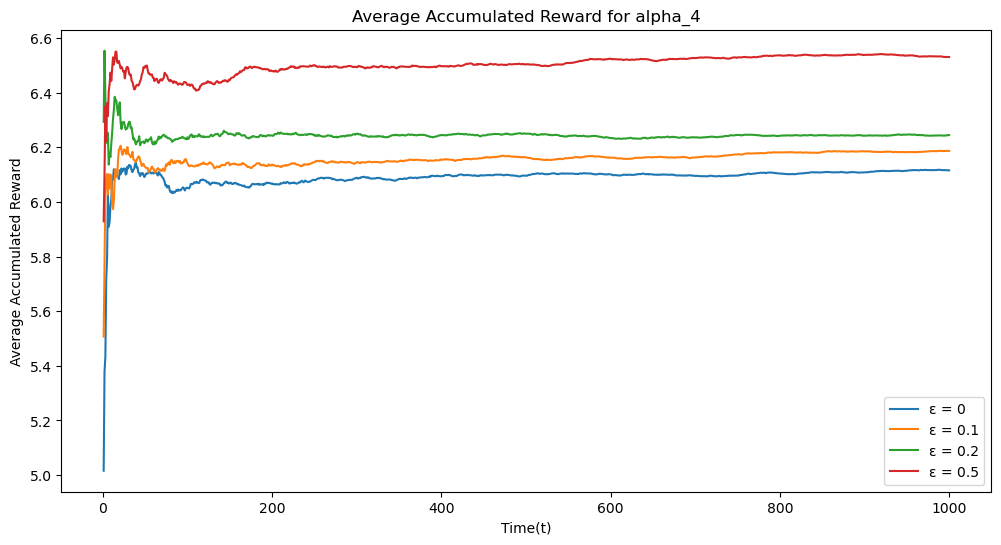

In [9]:
#Plot the results
for alpha_name, alpha_func in learning_rates.items():
    plt.figure(figsize=(12, 6))
    for epsilon in epsilon_values:
        avg_rewards, avg_Q_values = simulate_bandit(epsilon, alpha_func)
        plt.plot(range(1, len(avg_rewards) + 1), avg_rewards, label=f"ε = {epsilon}")

        # Print final Q-values
        print(f"Learning Rate: {alpha_name}, ε = {epsilon}")
        print(f"Average Q(a1): {avg_Q_values[0]:.2f}, True Q*(a1): 6")
        print(f"Average Q(a2): {avg_Q_values[1]:.2f}, True Q*(a2): 7\n")

    plt.xlabel("Time(t)")
    plt.ylabel("Average Accumulated Reward")
    plt.title(f"Average Accumulated Reward for {alpha_name}")
    plt.legend()
    plt.show()

In [11]:
def part_b_simulation(alpha=0.1, epsilon=0.1, steps=1000, runs=100):
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd

    # Reward distributions
    mu_1, sigma_1 = 6, np.sqrt(15)  # Lever 1: Gaussian
    mu_21, sigma_21 = 11, np.sqrt(16)  # Lever 2: Gaussian 1
    mu_22, sigma_22 = 3, np.sqrt(8)  # Lever 2: Gaussian 2

    # Epsilon-greedy policy
    def epsilon_greedy(Q, epsilon):
        if np.random.rand() < epsilon:
            return np.random.choice([0, 1])  # Random action
        return np.argmax(Q)  # Greedy action

    # Simulation function for a single initial Q-value setup
    def simulate_with_initial_Q(initial_Q):
        accumulated_rewards = np.zeros((runs, steps))  # To store rewards for each run
        final_Q_values = np.zeros((runs, 2))  # Store Q-values at the end of 1000 steps

        for run in range(runs):
            Q = np.array(initial_Q.copy())  # Initialize Q-values
            rewards = []

            for k in range(1, steps + 1):
                # Select an action using epsilon-greedy
                action = epsilon_greedy(Q, epsilon)

                # Get reward based on the action
                if action == 0:
                    reward = np.random.normal(mu_1, sigma_1)
                else:
                    reward = np.random.choice([np.random.normal(mu_21, sigma_21), 
                                               np.random.normal(mu_22, sigma_22)])

                # Update Q-value using learning rate
                Q[action] += alpha * (reward - Q[action])

                # Track accumulated reward
                if k == 1:
                    rewards.append(reward)
                else:
                    rewards.append((rewards[-1] * (k - 1) + reward) / k)

            accumulated_rewards[run] = rewards
            final_Q_values[run] = Q

        # Compute averages over all runs
        avg_accumulated_rewards = np.mean(accumulated_rewards, axis=0)
        avg_Q_values = np.mean(final_Q_values, axis=0)

        return avg_accumulated_rewards, avg_Q_values

    # Initial Q-values
    initial_Q_values = {
        "Q = [0, 0]": [0, 0],
        "Q = [6, 7]": [6, 7],
        "Q = [15, 15]": [15, 15]
    }

    # Run simulations and store results
    results = {}
    for label, initial_Q in initial_Q_values.items():
        avg_rewards, avg_Q_values = simulate_with_initial_Q(initial_Q)
        results[label] = (avg_rewards, avg_Q_values)

    # Plot results
    plt.figure(figsize=(12, 6))
    for label, (avg_rewards, _) in results.items():
        plt.plot(range(1, len(avg_rewards) + 1), avg_rewards, label=label)

    plt.xlabel("Steps")
    plt.ylabel("Average Accumulated Reward")
    plt.title("Average Accumulated Reward for Different Initial Q-values")
    plt.legend()
    plt.show()

    # Create a summary table
    q_table = pd.DataFrame(columns=["Initial Q values", "Avg Q(a1)", "True Q*(a1)", "Avg Q(a2)", "True Q*(a2)"])
    for label, (_, avg_Q_values) in results.items():
        q_table.loc[len(q_table)] = [label, avg_Q_values[0], 6, avg_Q_values[1], 7]

    # Display the table
    print("\nQ-Values Comparison for Initial Q-Values")
    print(q_table.to_string(index=False))

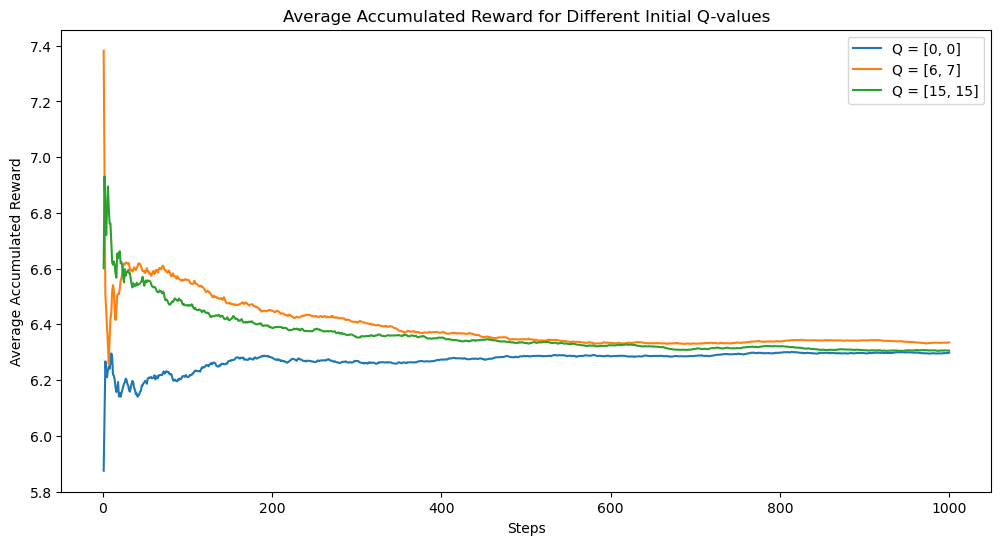


Q-Values Comparison for Initial Q-Values
Initial Q values  Avg Q(a1)  True Q*(a1)  Avg Q(a2)  True Q*(a2)
      Q = [0, 0]       0.88            6       0.99            7
      Q = [6, 7]       0.83            6       1.06            7
    Q = [15, 15]       0.94            6       0.90            7


In [13]:
part_b_simulation()

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_bandit_simulation(alpha=0.1, steps=1000, runs=100):
    # Reward distributions
    mu_1, sigma_1 = 6, np.sqrt(15)  # Lever 1: Gaussian
    mu_21, sigma_21 = 11, np.sqrt(16)  # Lever 2: Gaussian 1
    mu_22, sigma_22 = 3, np.sqrt(8)  # Lever 2: Gaussian 2

    # Helper function to compute softmax probabilities
    def softmax(H):
        exp_H = np.exp(H)
        return exp_H / np.sum(exp_H)

    # Initialize results
    gradient_rewards = np.zeros((runs, steps))
    greedy_rewards = np.zeros((runs, steps))

    for run in range(runs):
        # Gradient-Bandit variables
        H = np.array([0.0, 0.0])  # Initial preferences
        baseline = 0  # Initial baseline
        rewards = []

        # Epsilon-Greedy variables
        Q = np.array([0.0, 0.0])  # Initial Q-values
        epsilon = 0.1
        greedy_rewards_run = []

        for t in range(1, steps + 1):
            # Gradient-Bandit policy
            probs = softmax(H)  # Compute probabilities using softmax
            action = np.random.choice([0, 1], p=probs)  # Select action based on probabilities
            reward = np.random.normal(mu_1, sigma_1) if action == 0 else \
                     np.random.choice([np.random.normal(mu_21, sigma_21), 
                                       np.random.normal(mu_22, sigma_22)])

            # Update baseline and preferences
            baseline += (reward - baseline) / t
            for a in range(2):
                if a == action:
                    H[a] += alpha * (reward - baseline) * (1 - probs[a])
                else:
                    H[a] -= alpha * (reward - baseline) * probs[a]

            # Track rewards
            if t == 1:
                rewards.append(reward)
            else:
                rewards.append((rewards[-1] * (t - 1) + reward) / t)

            # Epsilon-Greedy policy
            if np.random.rand() < epsilon:
                greedy_action = np.random.choice([0, 1])  # Random action
            else:
                greedy_action = np.argmax(Q)  # Greedy action
            greedy_reward = np.random.normal(mu_1, sigma_1) if greedy_action == 0 else \
                            np.random.choice([np.random.normal(mu_21, sigma_21), 
                                              np.random.normal(mu_22, sigma_22)])
            Q[greedy_action] += alpha * (greedy_reward - Q[greedy_action])  # Update Q-value
            if t == 1:
                greedy_rewards_run.append(greedy_reward)
            else:
                greedy_rewards_run.append((greedy_rewards_run[-1] * (t - 1) + greedy_reward) / t)

        gradient_rewards[run] = rewards
        greedy_rewards[run] = greedy_rewards_run

    # Compute average accumulated rewards
    avg_gradient_rewards = np.mean(gradient_rewards, axis=0)
    avg_greedy_rewards = np.mean(greedy_rewards, axis=0)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, steps + 1), avg_gradient_rewards, label="Gradient-Bandit", color="blue")
    plt.plot(range(1, steps + 1), avg_greedy_rewards, label="Epsilon-Greedy", color="orange")
    plt.xlabel("Steps")
    plt.ylabel("Average Accumulated Reward")
    plt.title("Gradient-Bandit vs Epsilon-Greedy")
    plt.legend()
    plt.show()

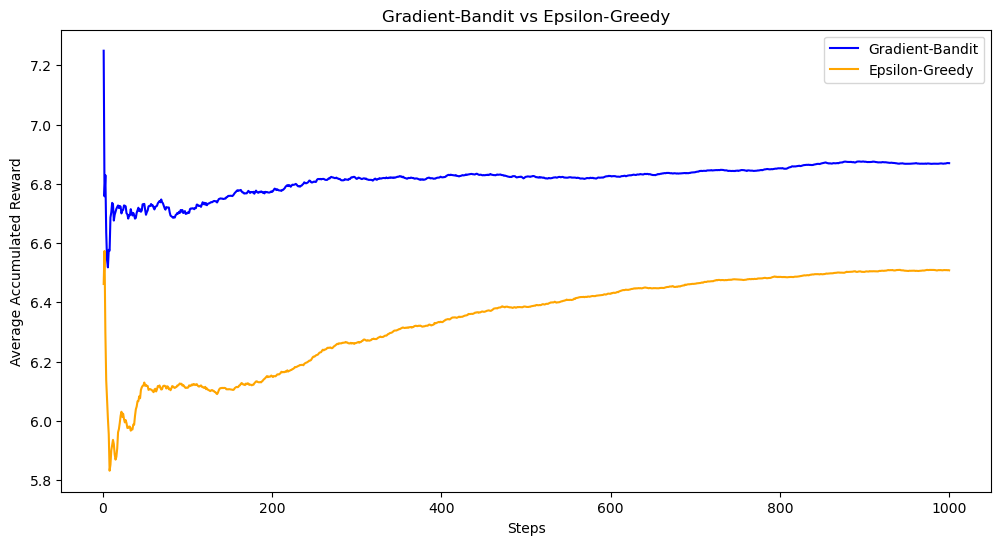

In [17]:
gradient_bandit_simulation()